In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# DP Formula
# V[x] = max(0, [xp + (1-x)q] V(x_win) + [x(1-p) + (1-x)(1-q)] V(x_lose) + [xp + (1-x)q] - c ))

In [22]:
roundfactor = 2

def update_prior(x,p,q,c,result):
    if result == True:
        out = p*x/(win(x,p,q))
    else:
        out = (1 - p)*x/(lose(x,p,q))
    return round(out,roundfactor)

def expected_outcome(x,p,q,c):
    out = win(x,p,q) - c
    return round(out,roundfactor)

def win(x,p,q):
    return x*p + (1-x)*q

def lose(x,p,q):
    return x*(1-p) + (1-x)*(1-q)

def get_recursive_value(x,p,q,c,V):
    pass

In [23]:
def split_recurrence_single(x,p,q,c, delta, high, low, V_dict, Sym_dict, debug = False):
    if debug:
        print("---at", x)
    
    # need to check for rounding error
    for i in range(-3,4,1):
        if x + i/10000 in Sym_dict:
            x = x + i/10000
            break
    
    if x in V_dict:
        return V_dict[x], V_dict, Sym_dict
    if x in Sym_dict:
        return Sym_dict[x], V_dict, Sym_dict
    elif x < low:
        V_dict[x] = 0
        temp = Symbol("var" + str(x))
        Sym_dict[x] = temp
        return 0, V_dict, Sym_dict
    elif x > high:
        V_dict[x] = round(expected_outcome(1,p,q,c)/(1 - delta), 4)
        temp = Symbol("var" + str(x))
        Sym_dict[x] = temp
        return V_dict[x], V_dict, Sym_dict
    else:
        temp = Symbol("var" + str(x))
        Sym_dict[x] = temp
        
        c_0 = expected_outcome(x,p,q,c)
        
        p_w = win(x,p,q)
        x_w = update_prior(x,p,q,c,True)
        
        p_l = lose(x,p,q)
        x_l = update_prior(x,p,q,c,False)
        
        s_1, V_dict, Sym_dict = split_recurrence_single(x_w,p,q,c,delta,high,low,V_dict,Sym_dict)
        s_2, V_dict, Sym_dict = split_recurrence_single(x_l,p,q,c,delta,high,low,V_dict,Sym_dict)
        
        out = delta*p_w*s_1 + delta*p_l*s_2 + c_0 # V[x] formula
        
        V_dict[x] = out
        return out, V_dict, Sym_dict
    
def solve_split_recurrence(x,p,q,c,delta,high,low, debug = False):
    V_dict = {}
    Sym_dict = {}
    val, V_dict, Sym_dict = split_recurrence_single(x,p,q,c,delta,high,low, V_dict, Sym_dict)
    
    if debug:
        print('---HELLO---')
        print("max possible value", round(expected_outcome(1,p,q,c)/(1 - delta), 4))

    t_dict = {}
    for k in V_dict:
        if debug:
            print(k,V_dict[k])
        if k in Sym_dict:
            t_dict[k] = V_dict[k] - Sym_dict[k]

    print(t_dict.values, Sym_dict.values())
    ans = solve(tuple(t_dict.values()), tuple(Sym_dict.values()))

    x_plot = []
    y_plot = []
    
    if debug: print('---sol---')

    for k,v in ans.items():
        if debug: print(k,v)
        if v < 0: print("WARNING v < 0",k,v)
        y_plot.append(v)
        x_plot.append(float(str(k)[3:]))
    
    return x_plot, y_plot

min x is 0.345


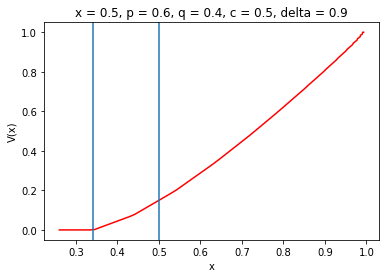

In [14]:
x_tot = []
y_tot = []
high, low = 0.99, 0.34

delta = 0.9 # discount rate
x = 0.5
p = 0.6
q = 0.4
c = 0.5
debug = False # set true to see equations


for x_temp in [0.5, 0.51, 0.62, 0.53, 0.64, 0.55, 0.66, 0.57, 0.68, 0.59]:
    x_plot, y_plot = solve_split_recurrence(x_temp, p,q,c,delta,high,low, debug)
    x_tot += x_plot
    y_tot += y_plot
    
min_x = 1
for i in range(len(x_tot)):
    if y_tot[i] > 0 and x_tot[i] < min_x:
        min_x = x_tot[i]

print("min x is", min_x)

x_tot = sorted(x_tot)
y_tot = sorted(y_tot)

plt.plot(x_tot, y_tot,'r')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title(f'x = {x}, p = {p}, q = {q}, c = {c}, delta = {delta}')
plt.axvline(x=low)
plt.axvline(x=(c-q)/(p-q))
plt.show()

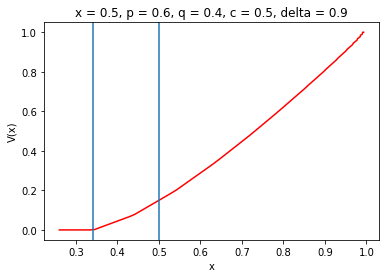

In [17]:
plt.plot(x_tot, y_tot,'r')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title(f'x = {x}, p = {p}, q = {q}, c = {c}, delta = {delta}')
plt.axvline(x=low,label='test')
plt.axvline(x=(c-q)/(p-q))
plt.show()

In [24]:
x_tot = []
y_tot = []
high, low = 0.99, 0.34

delta = 0.9 # discount rate
x = 0.5
p = 0.7
q = 0.4
c = 0.5
debug = False # set true to see equations


# for x_temp in [0.5, 0.51, 0.62, 0.53, 0.64, 0.55, 0.66, 0.57, 0.68, 0.59]:
x_plot, y_plot = solve_split_recurrence(0.5, p,q,c,delta,high,low, debug)
x_tot += x_plot
y_tot += y_plot
    
min_x = 1
for i in range(len(x_tot)):
    if y_tot[i] > 0 and x_tot[i] < min_x:
        min_x = x_tot[i]

print("min x is", min_x)

plt.plot(x_tot, y_tot, 'ro')
plt.show()

<built-in method values of dict object at 0x11a18be58> dict_values([var0.5, var0.64, var0.76, var0.85, var0.91, var0.95, var0.97, var0.98, var0.99, var0.96, var0.92, var0.94, var0.89, var0.93, var0.87, var0.77, var0.63, var0.75, var0.84, var0.9, var0.82, var0.69, var0.8, var0.88, var0.79, var0.65, var0.48, var0.62, var0.74, var0.83, var0.71, var0.81, var0.68, var0.52, var0.35, var0.49, var0.32, var0.21, var0.55, var0.38, var0.23, var0.59, var0.72, var0.56, var0.39, var0.53, var0.66, var0.36, var0.22, var0.24, var0.42, var0.27, var0.45, var0.29, var0.67, var0.78, var0.86, var0.6, var0.43, var0.57, var0.7, var0.54, var0.37, var0.51, var0.34, var0.47, var0.61, var0.73, var0.44, var0.58, var0.41, var0.26, var0.28, var0.31, var0.2, var0.4, var0.25, var0.46, var0.3, var0.33])


KeyboardInterrupt: 